```
Q  9: Write a Python function to calculate and visualize the confidence interval
for a sample mean..
```


Example 1: Using known population standard deviation (Z-interval)

--- 95% Confidence Interval (Known Pop Std Dev) ---
Interval Type: Z-Interval
Sample Size (n): 30
Sample Mean: 71.500
Population Standard Deviation (σ): 3.500
Confidence Level: 95.0%
Critical Value: 1.960
Standard Error: 0.639
Margin of Error: 1.252
Confidence Interval: [70.248, 72.752]


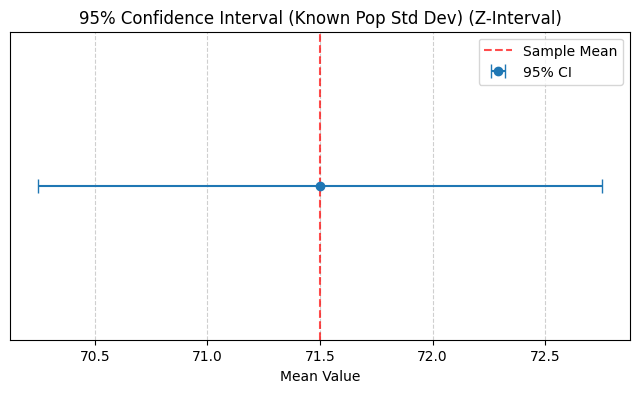


Example 2: Using unknown population standard deviation (T-interval)

--- 99% Confidence Interval (Unknown Pop Std Dev) ---
Interval Type: T-Interval
Sample Size (n): 15
Sample Mean: 13.467
Sample Standard Deviation (s): 2.066
Confidence Level: 99.0%
Critical Value: 2.977
Standard Error: 0.533
Margin of Error: 1.588
Confidence Interval: [11.879, 15.054]


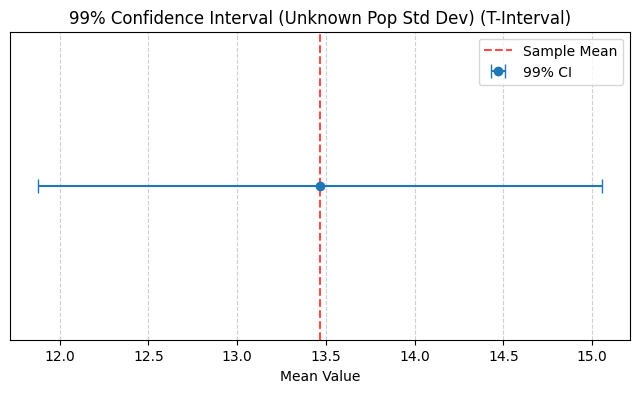


Example 3: T-interval with a smaller sample (n=5)

--- 90% Confidence Interval (Small Sample T-Interval) ---
Interval Type: T-Interval
Sample Size (n): 5
Sample Mean: 51.000
Sample Standard Deviation (s): 1.581
Confidence Level: 90.0%
Critical Value: 2.132
Standard Error: 0.707
Margin of Error: 1.507
Confidence Interval: [49.493, 52.507]


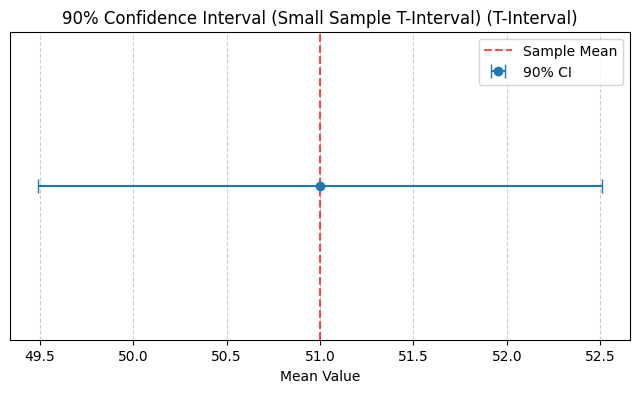

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def calculate_and_visualize_confidence_interval(
    data,
    confidence_level=0.95,
    pop_std=None,
    plot_title="Confidence Interval for Sample Mean"
):
    """
    Calculates and visualizes the confidence interval for a sample mean.

    Args:
        data (array-like): The sample data.
        confidence_level (float): The desired confidence level (e.g., 0.95 for 95%).
        pop_std (float, optional): The known population standard deviation.
                                   If None, a t-interval is used. Defaults to None.
        plot_title (str): Title for the visualization plot.

    Returns:
        tuple: A tuple containing (lower_bound, upper_bound, sample_mean, margin_of_error).
    """
    n = len(data)
    if n < 2:
        raise ValueError("Sample size must be at least 2 to calculate a confidence interval.")

    sample_mean = np.mean(data)

    alpha = 1 - confidence_level

    if pop_std is not None:  # Z-interval: population standard deviation is known
        std_error = pop_std / np.sqrt(n)
        # For a two-tailed interval, we need alpha/2 in each tail
        critical_value = stats.norm.ppf(1 - alpha / 2)
        interval_type = "Z-Interval"
    else:  # T-interval: population standard deviation is unknown
        sample_std = np.std(data, ddof=1) # ddof=1 for sample standard deviation
        if sample_std == 0:
             raise ValueError("Cannot calculate confidence interval with zero sample standard deviation.")
        std_error = sample_std / np.sqrt(n)
        degrees_freedom = n - 1
        critical_value = stats.t.ppf(1 - alpha / 2, df=degrees_freedom)
        interval_type = "T-Interval"

    margin_of_error = critical_value * std_error
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    print(f"\n--- {plot_title} ---")
    print(f"Interval Type: {interval_type}")
    print(f"Sample Size (n): {n}")
    print(f"Sample Mean: {sample_mean:.3f}")
    if pop_std is not None:
        print(f"Population Standard Deviation (σ): {pop_std:.3f}")
    else:
        print(f"Sample Standard Deviation (s): {np.std(data, ddof=1):.3f}")
    print(f"Confidence Level: {confidence_level*100:.1f}%")
    print(f"Critical Value: {critical_value:.3f}")
    print(f"Standard Error: {std_error:.3f}")
    print(f"Margin of Error: {margin_of_error:.3f}")
    print(f"Confidence Interval: [{lower_bound:.3f}, {upper_bound:.3f}]")

    # Visualization
    plt.figure(figsize=(8, 4))
    plt.errorbar(x=sample_mean, y=0, xerr=margin_of_error, fmt='o', capsize=5,
                 label=f'{int(confidence_level*100)}% CI')
    plt.axvline(x=sample_mean, color='red', linestyle='--', alpha=0.7, label='Sample Mean')

    plt.yticks([]) # Hide y-axis ticks
    plt.title(plot_title + f' ({interval_type})')
    plt.xlabel('Mean Value')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

    return lower_bound, upper_bound, sample_mean, margin_of_error

# --- Example Usage ---
# Using the 'data' variable from the notebook state and a known population standard deviation 'sigma'
print("\nExample 1: Using known population standard deviation (Z-interval)")
# Assuming 'data' and 'sigma' are already defined in the notebook context
# data = np.array([72, 75, 68, 70, 71, 73, 76, 69, 74, 72, 67, 70, 71, 72, 75, 73, 70, 68, 74, 71, 70, 72, 73, 69, 71, 70, 72, 75, 69, 73])
# sigma = 3.5
# alpha = 0.05 (for 95% confidence level)

lower_z, upper_z, mean_z, moe_z = calculate_and_visualize_confidence_interval(
    data,
    confidence_level=1-alpha, # Using the existing alpha variable
    pop_std=sigma, # Using the existing sigma variable
    plot_title="95% Confidence Interval (Known Pop Std Dev)"
)

# Example 2: Using unknown population standard deviation (T-interval)
# Let's create a new sample dataset to demonstrate the t-interval, or use 'data' again.
print("\nExample 2: Using unknown population standard deviation (T-interval)")
sample_data_t = np.array([12, 15, 11, 14, 13, 16, 10, 17, 13, 15, 12, 14, 11, 13, 16])

lower_t, upper_t, mean_t, moe_t = calculate_and_visualize_confidence_interval(
    sample_data_t,
    confidence_level=0.99, # 99% confidence level
    pop_std=None, # Pop std is unknown, so use T-interval
    plot_title="99% Confidence Interval (Unknown Pop Std Dev)"
)

# Example 3: Smaller sample size for T-interval emphasis
print("\nExample 3: T-interval with a smaller sample (n=5)")
small_sample = np.array([50, 52, 49, 53, 51])

lower_small_t, upper_small_t, mean_small_t, moe_small_t = calculate_and_visualize_confidence_interval(
    small_sample,
    confidence_level=0.90, # 90% confidence level
    pop_std=None,
    plot_title="90% Confidence Interval (Small Sample T-Interval)"
)
